In [10]:
#1. Custom K-Means Implementation (NumPy Only)
import numpy as np

class CustomKMeans:
    def __init__(self, k, max_iters=300, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
    
    def initialize_centroids(self, X):
        idx = np.random.choice(len(X), self.k, replace=False)
        return X[idx]
    
    def assign_clusters(self, X, centroids):
        # compute distance from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, X, labels):
        new_centroids = []
        for i in range(self.k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                # reinitialize empty cluster
                new_centroids.append(X[np.random.choice(len(X))])
            else:
                new_centroids.append(cluster_pts.mean(axis=0))
        return np.array(new_centroids)
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        
        for _ in range(self.max_iters):
            old_centroids = self.centroids.copy()
            labels = self.assign_clusters(X, self.centroids)
            self.centroids = self.update_centroids(X, labels)
            
            if np.linalg.norm(self.centroids - old_centroids) < self.tol:
                break
        
        self.labels_ = labels
        return self
    
    def predict(self, X):
        return self.assign_clusters(X, self.centroids)

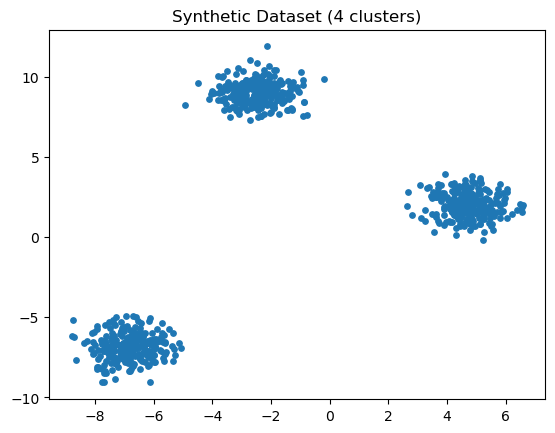

In [ ]:
# Generate 2D Synthetic Dataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=800, centers=3, cluster_std=0.75, random_state=42)

plt.scatter(X[:,0], X[:,1], s=15)
plt.title("Synthetic Dataset (3 clusters)")
plt.show()


In [12]:
# 3. Elbow Method (SSE) & Silhouette Score (From Scratch)

def compute_sse(X, labels, centroids):
    sse = 0
    for i in range(len(centroids)):
        cluster_pts = X[labels == i]
        sse += ((cluster_pts - centroids[i])**2).sum()
    return sse


In [13]:
# Silhouette Score (Pure NumPy)
def silhouette_score_numpy(X, labels):
    n = len(X)
    unique_labels = np.unique(labels)
    k = len(unique_labels)
    
    # Precompute full distance matrix
    dist_matrix = np.linalg.norm(X[:, np.newaxis] - X, axis=2)

    a = np.zeros(n)
    b = np.full(n, np.inf)

    for i in range(n):
        same_cluster = labels == labels[i]
        other_clusters = labels != labels[i]

        # a(i): mean intra-cluster distance
        a[i] = np.mean(dist_matrix[i, same_cluster & (np.arange(n) != i)])

        # b(i): minimum mean distance to another cluster
        for lbl in unique_labels:
            if lbl != labels[i]:
                cluster_pts = labels == lbl
                b[i] = min(b[i], np.mean(dist_matrix[i, cluster_pts]))

    s = (b - a) / np.maximum(a, b)
    return np.mean(s)


In [14]:
# 4. Determine Optimal K Using Elbow + Silhouette

Ks = range(2, 10)
sse_values = []
sil_values = []

for k in Ks:
    model = CustomKMeans(k).fit(X)
    sse_values.append(compute_sse(X, model.labels_, model.centroids))
    sil_values.append(silhouette_score_numpy(X, model.labels_))


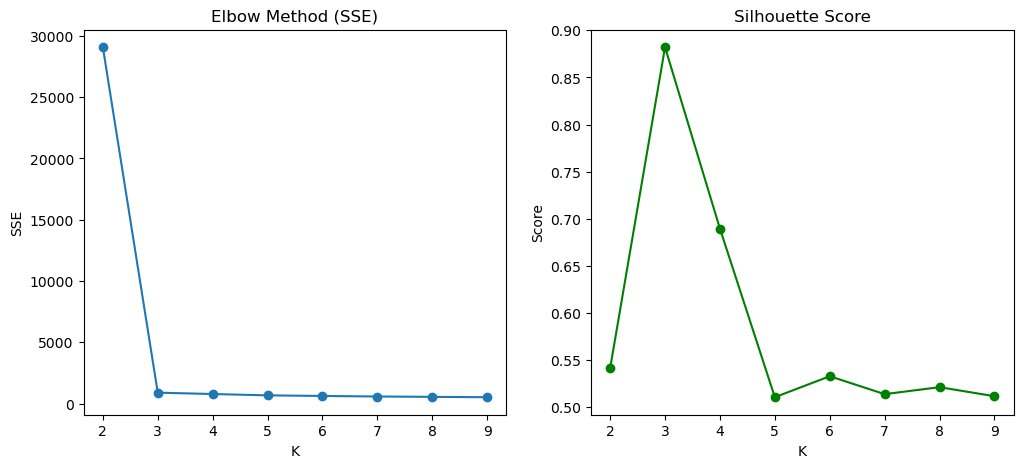

In [15]:
# Plot Results
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(Ks, sse_values, marker='o')
plt.title("Elbow Method (SSE)")
plt.xlabel("K")
plt.ylabel("SSE")

plt.subplot(1,2,2)
plt.plot(Ks, sil_values, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Score")

plt.show()
